In [1]:
### Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
### Loading data
telecom_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


1 Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2 Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3 Derive new features.

4 Reduce the number of variables using PCA.

5 Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6 Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7 Finally, choose a model based on some evaluation metric.

### 1 Preprocess data (convert columns to appropriate formats, handle missing values, etc.)


In [4]:
telecom_data = telecom_data.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',  'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8','date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8' ], axis=1)

In [5]:
telecom_data.shape

(99999, 210)

In [6]:
select_cols = [col for col in telecom_data.columns if '_rech_amt_' in col]
print(select_cols)

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [7]:
telecom_data["Average_6_7"] = telecom_data.loc[:,['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [8]:
telecom_data["Average_6_7"].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: Average_6_7, dtype: float64

In [9]:
telecom_data.describe(percentiles=[.25,.5,.70,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_6_7
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,...,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373,325.238792
std,6.956694e+05,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,...,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353,370.833466
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,34.730000,...,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000,115.000000
50%,7.001205e+09,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,96.310000,...,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000,229.000000
70%,7.001690e+09,324.839400,317.910400,322.134600,305.968400,91.090000,87.696000,87.960000,84.162000,191.780000,...,1.000000,1.000000,1.000000,1.000000,1510.000000,0.000000,0.000000,0.000000,0.000000,368.500000
90%,7.002174e+09,620.075400,617.252000,618.160400,601.537000,344.102000,348.035000,345.030000,342.890000,477.325000,...,1.000000,1.000000,1.000000,1.000000,2799.200000,160.372000,139.302000,112.646000,0.000000,698.000000
95%,7.002291e+09,829.488200,828.357200,833.303300,805.107200,612.407500,624.835500,620.690000,617.232500,727.879000,...,1.000000,1.000000,1.000000,1.000000,3110.000000,465.213000,450.705000,400.178000,0.500000,937.500000
99%,7.002387e+09,1410.792540,1428.685880,1455.539960,1402.445660,1431.760500,1478.533300,1480.334000,1445.766400,1539.535800,...,1.000000,1.000000,1.000000,1.000000,3651.000000,1240.063600,1278.158000,1187.785200,86.554000,1590.000000


In [10]:
# selecting only high value customers

np.percentile(telecom_data['Average_6_7'],70)
telecom_data_high_value = telecom_data.loc[telecom_data["Average_6_7"] > 368.5,:]
#telecom_data_high_value = telecom_data.loc[telecom_data["Average_6_7"] > 369,:]

In [11]:
telecom_data_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 211 entries, mobile_number to Average_6_7
dtypes: float64(171), int64(34), object(6)
memory usage: 48.5+ MB


In [12]:
telecom_data_high_value.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_6_7
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.000000,28276.000000,29663.000000,...,11387.000000,11652.000000,11741.000000,11447.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,7.001223e+09,587.587624,589.424681,535.067748,488.869400,299.392147,307.701888,276.459159,255.436275,422.582059,...,0.897603,0.889804,0.837322,0.832096,1264.158911,129.482436,135.225368,121.450911,6.554528,697.014644
std,6.846594e+05,442.848876,463.049067,492.447887,496.672348,462.369385,483.432401,471.700220,452.083928,471.281393,...,0.303184,0.313147,0.369087,0.373798,975.181038,390.625027,408.218570,389.910814,48.630605,488.925223
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000
25%,7.000641e+09,364.352500,365.235000,289.782000,239.315500,43.030000,42.775000,32.240000,26.175000,141.440000,...,1.000000,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000
50%,7.001232e+09,495.951000,493.781000,452.232000,413.331000,128.480000,128.120000,106.390000,94.170000,285.990000,...,1.000000,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000
75%,7.001814e+09,704.184500,700.986000,671.349500,635.834000,357.655000,365.127500,310.360000,281.245000,527.605000,...,1.000000,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,...,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000


In [13]:
telecom_data_high_value["Churn_NoChurn"] = np.where((telecom_data_high_value["total_ic_mou_9"] == 0) & 
                                                    (telecom_data_high_value["total_og_mou_9"] == 0) &
                                                    (telecom_data_high_value["vol_2g_mb_9"] == 0) &
                                                    (telecom_data_high_value["vol_3g_mb_9"] == 0), 1,0)

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
telecom_data_high_value["Churn_NoChurn"].sum()

2589

In [15]:
select_cols_9 = [col for col in telecom_data_high_value.columns if '_9' in col]
print(select_cols_9)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [16]:
td_hv_6_7_8 = telecom_data_high_value.drop(select_cols_9,axis=1)

In [17]:
td_hv_6_7_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 158 entries, mobile_number to Churn_NoChurn
dtypes: float64(128), int32(1), int64(26), object(3)
memory usage: 36.3+ MB


In [18]:
td_hv_6_7_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 158 entries, mobile_number to Churn_NoChurn
dtypes: float64(128), int32(1), int64(26), object(3)
memory usage: 36.3+ MB


In [19]:
td_hv_6_7_8["Churn_NoChurn"] = td_hv_6_7_8["Churn_NoChurn"].astype("int")
category_col = list(td_hv_6_7_8.select_dtypes(include="object").columns)
float_col = list(td_hv_6_7_8.select_dtypes(include="float").columns)
int32_col = list(td_hv_6_7_8.select_dtypes(include = "int32").columns)
int64_col = list(td_hv_6_7_8.select_dtypes(include = "int64").columns)

In [20]:
print(len(float_col))
print(len(int32_col))
print(len(int64_col))
print(len(category_col))

128
1
26
3


In [21]:
td_hv_6_7_8.loc[:,category_col] = td_hv_6_7_8.loc[:,category_col].astype("datetime64")

In [22]:
td_hv_6_7_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 158 entries, mobile_number to Churn_NoChurn
dtypes: datetime64[ns](3), float64(128), int32(1), int64(26)
memory usage: 36.3 MB


In [23]:
null_columns=td_hv_6_7_8.columns[td_hv_6_7_8.isnull().any()].tolist()
#td_hv_6_7_8[null_columns].isnull().sum()
#null_columns

In [24]:
df = td_hv_6_7_8
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df_high = missing_value_df[missing_value_df["percent_missing"] > 30]
print(missing_value_df_high)
missing_value_columns = missing_value_df_high["column_name"].tolist()
missing_value_columns

                                       column_name  percent_missing
date_of_last_rech_data_6  date_of_last_rech_data_6        62.016745
date_of_last_rech_data_7  date_of_last_rech_data_7        61.132793
date_of_last_rech_data_8  date_of_last_rech_data_8        60.835918
total_rech_data_6                total_rech_data_6        62.016745
total_rech_data_7                total_rech_data_7        61.132793
total_rech_data_8                total_rech_data_8        60.835918
max_rech_data_6                    max_rech_data_6        62.016745
max_rech_data_7                    max_rech_data_7        61.132793
max_rech_data_8                    max_rech_data_8        60.835918
count_rech_2g_6                    count_rech_2g_6        62.016745
count_rech_2g_7                    count_rech_2g_7        61.132793
count_rech_2g_8                    count_rech_2g_8        60.835918
count_rech_3g_6                    count_rech_3g_6        62.016745
count_rech_3g_7                    count_rech_3g

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [25]:
td_hv_6_7_8_removed_mv_cols = td_hv_6_7_8.drop(columns=missing_value_columns)
td_hv_6_7_8_removed_mv_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 128 entries, mobile_number to Churn_NoChurn
dtypes: float64(101), int32(1), int64(26)
memory usage: 29.4 MB


In [26]:
td_hv_6_7_8_removed_mv_cols_rows = td_hv_6_7_8_removed_mv_cols.dropna()
td_hv_6_7_8_removed_mv_cols_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28829 entries, 7 to 99997
Columns: 128 entries, mobile_number to Churn_NoChurn
dtypes: float64(101), int32(1), int64(26)
memory usage: 28.3 MB


In [27]:
pd.value_counts(td_hv_6_7_8_removed_mv_cols_rows["Churn_NoChurn"].values)

0    27026
1     1803
dtype: int64

In [28]:
#for c in td_hv_6_7_8_removed_mv_cols_rows.columns:
#    print td_hv_6_7_8_removed_mv_cols_rows[c].value_counts()

In [29]:
#td_hv_6_7_8_removed_mv_cols_rows.apply(lambda x: x.value_counts())

In [30]:

master=td_hv_6_7_8_removed_mv_cols_rows

In [31]:
master.shape

(28829, 128)

In [32]:
print(round(100*master.isnull().sum()/len(master.index)),1)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
                     ... 
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8 

In [33]:
master = master[~(master['onnet_mou_6'].isnull())]

In [34]:
print(round(100*master.isnull().sum()/len(master.index)),1)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
                     ... 
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8 

In [35]:
master = master[~(master['onnet_mou_7'].isnull())]
master = master[~(master['onnet_mou_8'].isnull())]

In [36]:

master = master[~(master['offnet_mou_7'].isnull())]
master = master[~(master['offnet_mou_8'].isnull())]

In [37]:
print(round(100*master.isnull().sum()/len(master.index)),1)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
                     ... 
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8 

In [38]:
master.shape

(28829, 128)

#### Data cleaning ends ##

In [40]:
# EDA ##

In [41]:
# Since the third month is the ‘action’ phase, we expect the significance of variables in the eight month (having '_8' suffix)
# to be higher


In [42]:
# Creating correlation matrix for all the features

corrmat = master.corr()

In [43]:
corrmat.to_csv('corr_matrix.csv')

In [44]:
# checking correlation  matrix and selecting features that have correlation coefficients close to 0.1 pr above with 
# output variable - Churn_noChurn
# we select the following features:

# arpu_8, offnet_mou_8, roam_og_mou_7, roam_og_mou_8, loc_og_t2m_mou_8, loc_og_mou_8, std_og_mou_6, total_og_mou_8,
# loc_ic_t2m_mou_8, loc_ic_mou_8, total_rech_amt_8, aon

In [45]:
# the above features are quite consistent with the understanding variables in the eight month (having '_8' suffix) are
# more significant

In [46]:
# build a quick Random Forest model and check important features - do this after test train split

In [47]:
### Checking the Churn Rate
Churn_NoChurn = (sum(master['Churn_NoChurn'])/len(master['Churn_NoChurn'].index))*100
Churn_NoChurn

6.254119116167748

## Random UnderSampling

In [48]:
# Creating a sample data from the master data as we see more skweness

master = master.sample(frac=1)

# amount of Churn classes 2587 rows.
Churn_master = master.loc[master['Churn_NoChurn'] == 1]
NoChurn_master = master.loc[master['Churn_NoChurn'] == 0][:2587]

normal_distributed_master = pd.concat([Churn_master, NoChurn_master])

# Shuffle dataframe rows
new_master = normal_distributed_master.sample(frac=1, random_state=42)

new_master.head()
new_master.shape

(4390, 128)

#### High dimensionality indicates the use of PCA 
#### Before PCA, scale the data and split into test and train

In [50]:
# Data scaling (only for continuous variables)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
num_vars= new_master.iloc[:, (np.where((new_master.dtypes == np.int64) | (new_master.dtypes == np.float64)))[0]].columns
num_vars

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Average_6_7'],
      dtype='object', length=127)

In [52]:
new_master[num_vars]=scaler.fit_transform(new_master[num_vars])

## Splitting the Data in Test-Train

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
X = new_master.drop(['Churn_NoChurn', 'mobile_number'], axis=1)

In [55]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_6_7
45471,0.756370,-0.297379,2.313172,0.543202,-0.132584,3.283037,0.215800,-0.349879,0.429457,0.299579,...,-0.261851,-0.147901,-0.143145,-0.14172,-0.431111,-0.305666,-0.321890,-0.285002,-0.117971,0.535185
75391,-0.467514,-0.614881,-0.695873,-0.095802,-0.234759,-0.357700,-0.818334,-0.779409,-0.622951,-0.209887,...,1.726947,-0.147901,-0.143145,-0.14172,2.206173,2.569331,0.585003,1.095124,-0.117971,-0.714254
23265,0.894390,0.003498,-0.014191,1.042131,1.242059,0.434190,-0.291036,-0.343078,0.306267,3.029475,...,-0.261851,-0.147901,-0.143145,-0.14172,1.562511,-0.305666,-0.321890,-0.285002,-0.117971,0.181635
68282,-0.473435,-0.706525,-0.390875,-0.557007,-0.579175,-0.306480,-0.180593,-0.350288,-0.257872,-0.217679,...,-0.261851,-0.147901,-0.143145,-0.14172,-0.844739,-0.305666,-0.321890,-0.285002,-0.117971,-0.615855
24228,-0.032109,-0.413360,0.030554,-0.608368,-0.582058,-0.521944,-0.648118,-0.563065,-0.621984,-0.217679,...,3.715744,-0.147901,-0.143145,-0.14172,-0.002363,-0.018397,0.583185,0.781575,-0.117971,-0.541483


In [56]:
X.shape

(4390, 126)

In [57]:
# Putting response variable to y
y = new_master['Churn_NoChurn']

y.head()

45471    0
75391    0
23265    0
68282    0
24228    0
Name: Churn_NoChurn, dtype: int32

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
random_forest_initial = RandomForestClassifier(random_state=0, n_jobs=-1)

In [63]:
model_random_forest_initial= random_forest_initial.fit(X_train, y_train)

In [64]:
importances = model_random_forest_initial.feature_importances_
indices = np.argsort(importances)[::-1][0:20]
names = X_train.columns[indices]

In [65]:
names

Index(['roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'loc_og_t2m_mou_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'roam_ic_mou_8', 'arpu_8', 'std_ic_mou_8', 'loc_og_mou_7', 'aon',
       'loc_og_t2m_mou_7', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'total_og_mou_7', 'total_ic_mou_7'],
      dtype='object')

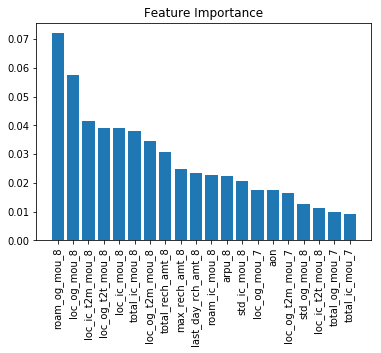

In [66]:
plt.figure
plt.title("Feature Importance")
plt.bar(range(X_train[names].shape[1]), importances[indices])
plt.xticks(range(X_train[names].shape[1]),names, rotation=90)
plt.show()

In [67]:
# again as discussed before features of the month of August (suffix _8) are important

In [68]:
## EDA ends ####

## Running First Training Model

In [69]:
import statsmodels.api as sm

In [70]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Churn_NoChurn   No. Observations:                 3073
Model:                            GLM   Df Residuals:                     2947
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 24 Mar 2019   Deviance:                          nan
Time:                        18:38:34   Pearson chi2:                 3.43e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.944e+14   1.22e+06  -6.49e+08      0.000   -7.94e+14   -7.94e+14
arpu_6              -1.31e+14    4.7e+06  -2.79e+07      0.000   -1.31e+14   -1.31e+14
arpu_7              1.595e+14   5.79e+06   2.76e+07      0.000    1.59e+14    1.59e+14
arpu_8              9.629e+12   5.68e+06    1.7e+06      0.000    9.63e+12    9.63e+12
onnet_mou_6         1.713e+16   1.38e+08   1.24e+08      0.000    1.71e+16    1.71e+16
onnet_mou_7         1.212e+15   8.79e+07   1.38e+07      0.000    1.21e+15    1.21e+15
onnet_mou_8        -2.366e+15   9.58e+07  -2.47e+07      0.000   -2.37e+15   -2.37e+15
offnet_mou_6        1.677e+16   1.35e+08   1.24e+08      0.000    1.68e+16    1.68e+16
offnet_mou_7        1.071e+15   8.91e+07    1.2e+07      0.000    1.07e+15    1.07e+15
offnet_mou_8        -2.58e+15   9.38e+07  -2.75e+07      0.000   -2.58e+15   -2.58e+15
roam_ic_mou_6         8.6e+13   2.08e+06   4.13e+07      0.000     8.6e+13     8.6e+13
roam_ic_mou_7       1.032e+13   2.75e+06   3.76e+06      0.000    1.03e+13    1.03e+13
roam_ic_mou_8      -7.409e+13   2.85e+06   -2.6e+07      0.000   -7.41e+13   -7.41e+13
roam_og_mou_6      -5.172e+15   4.16e+07  -1.24e+08      0.000   -5.17e+15   -5.17e+15
roam_og_mou_7      -1.408e+14   2.43e+07  -5.79e+06      0.000   -1.41e+14   -1.41e+14
roam_og_mou_8       9.672e+14   3.36e+07   2.88e+07      0.000    9.67e+14    9.67e+14
loc_og_t2t_mou_6    2.019e+18   5.69e+10   3.55e+07      0.000    2.02e+18    2.02e+18
loc_og_t2t_mou_7   -2.686e+18   5.34e+10  -5.03e+07      0.000   -2.69e+18   -2.69e+18
loc_og_t2t_mou_8    9.685e+17   4.91e+10   1.97e+07      0.000    9.69e+17    9.69e+17
loc_og_t2m_mou_6    1.912e+18   5.39e+10   3.55e+07      0.000    1.91e+18    1.91e+18
loc_og_t2m_mou_7   -2.471e+18   4.91e+10  -5.03e+07      0.000   -2.47e+18   -2.47e+18
loc_og_t2m_mou_8    9.298e+17   4.71e+10   1.97e+07      0.000     9.3e+17     9.3e+17
loc_og_t2f_mou_6    2.213e+17   6.23e+09   3.55e+07      0.000    2.21e+17    2.21e+17
loc_og_t2f_mou_7   -2.595e+17   5.16e+09  -5.03e+07      0.000    -2.6e+17    -2.6e+17
loc_og_t2f_mou_8    6.479e+16   3.28e+09   1.98e+07      0.000    6.48e+16    6.48e+16
loc_og_t2c_mou_6   -1.227e+13   1.51e+06  -8.11e+06      0.000   -1.23e+13   -1.23e+13
loc_og_t2c_mou_7   -1.467e+14   2.38e+06  -6.16e+07      0.000   -1.47e+14   -1.47e+14
loc_og_t2c_mou_8     1.22e+14   1.87e+06   6.52e+07      0.000    1.22e+14    1.22e+14
loc_og_mou_6       -5.196e+18   1.04e+11  -4.97e+07      0.000    -5.2e+18    -5.2e+18
loc_og_mou_7        3.694e+18   1.05e+11   3.53e+07      0.000    3.69e+18    3.69e+18
loc_og_mou_8        5.517e+18      1e+11   5.51e+07      0.000    5.52e+18    5.52e+18
std_og_t2t_mou_6     -2.7e+18   1.26e+11  -2.14e+07      0.000    -2.7e+18    -2.7e+18
std_og_t2t_mou_7   -4.017e+18   1.24e+11  -3.23e+07      0.000   -4.02e+18   -4.02e+18
std_og_t2t_mou_8    1.411e+19 

In [71]:
X_train.shape


(3073, 126)

## PCA Analysis

In [72]:
# PCA Analysis to reduce dimensionality

In [73]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [74]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [75]:
pca.components_

array([[ 1.02040576e-01,  1.11358200e-01,  1.48261160e-01, ...,
         5.99081352e-02,  2.76071201e-02,  1.19777241e-01],
       [ 1.50914796e-01,  1.56764279e-01,  1.10864546e-01, ...,
        -6.07311582e-02, -2.12066685e-02,  1.77939518e-01],
       [ 1.26318959e-01,  1.57198307e-01,  1.52510279e-01, ...,
         1.66447753e-01,  7.80972237e-02,  1.61854100e-01],
       ...,
       [ 3.79582847e-07,  1.52677401e-07,  3.79259018e-07, ...,
         6.04735305e-08, -1.26876592e-07, -2.00903826e-07],
       [ 2.29991943e-07,  4.18540230e-07,  2.64741461e-07, ...,
        -1.45006437e-07,  5.99546139e-08, -1.81963893e-07],
       [-0.00000000e+00, -9.41968250e-16,  6.23539287e-16, ...,
        -5.28240902e-16,  1.49609415e-16,  7.64140572e-01]])

In [76]:
pca.explained_variance_ratio_

array([1.04994294e-01, 8.48900410e-02, 5.08384023e-02, 4.40547980e-02,
       4.05101417e-02, 3.71883226e-02, 3.34864414e-02, 3.33482281e-02,
       3.02242975e-02, 2.81868143e-02, 2.48725820e-02, 2.33034800e-02,
       2.21298286e-02, 1.99553711e-02, 1.91461602e-02, 1.75132185e-02,
       1.68924739e-02, 1.64633592e-02, 1.53542619e-02, 1.43110761e-02,
       1.28730492e-02, 1.24637599e-02, 1.12692795e-02, 1.11033108e-02,
       1.08549178e-02, 1.02134442e-02, 9.65058066e-03, 9.41556292e-03,
       8.95631682e-03, 8.66714758e-03, 8.41565131e-03, 8.16962124e-03,
       7.92976191e-03, 7.42792817e-03, 7.34772432e-03, 7.07929251e-03,
       6.63916299e-03, 6.47698941e-03, 6.25310100e-03, 5.98972779e-03,
       5.78909430e-03, 5.76637004e-03, 5.48852150e-03, 5.26522206e-03,
       5.17052764e-03, 5.15250472e-03, 4.90119733e-03, 4.78410338e-03,
       4.70469835e-03, 4.66200486e-03, 4.42632345e-03, 4.26385969e-03,
       3.97171855e-03, 3.82506704e-03, 3.50321951e-03, 3.38552281e-03,
      

In [77]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.102041,0.150915,arpu_6
1,0.111358,0.156764,arpu_7
2,0.148261,0.110865,arpu_8
3,0.009907,0.175738,onnet_mou_6
4,0.022726,0.191142,onnet_mou_7


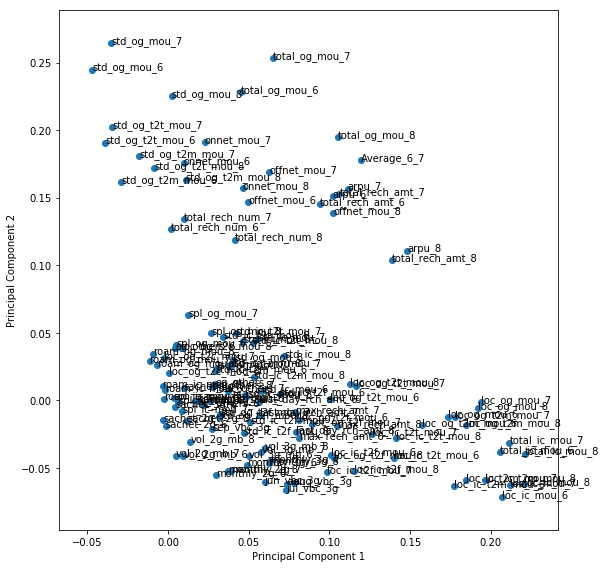

In [78]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

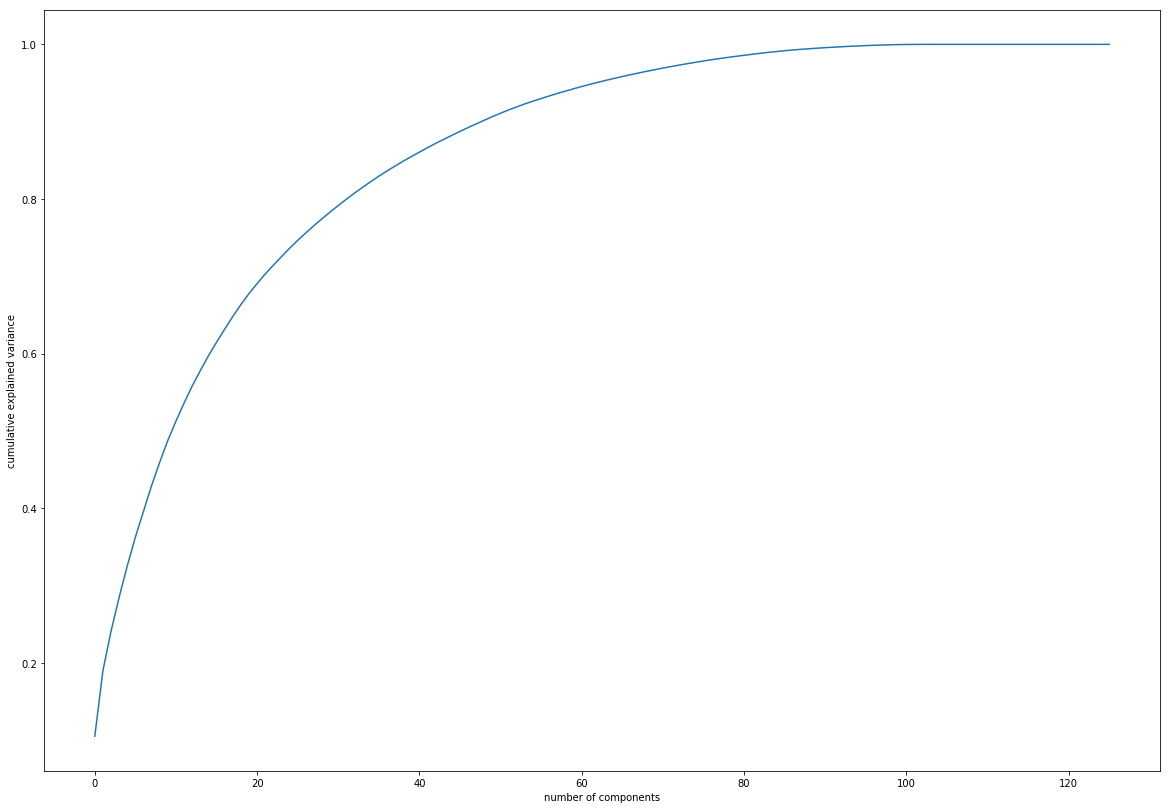

In [79]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (20,14))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [80]:
# specifying variance and doing pca again
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [81]:
def func_pca_again(variance, X_train, X_test, y_train):
    pca_again_initial_model = PCA(variance)
    df_train_pca_initial_model = pca_again_initial_model.fit_transform(X_train)

    df_test_pca_initial_model = pca_again_initial_model.transform(X_test)
    
    #Training the model on the train data
# Let's run the model using the selected variables
    logsk_initial_model = LogisticRegression()
    logsk_initial_model.fit(df_train_pca_initial_model, y_train)
    
    #Making prediction on the test data
    pred_probs_test_initial = logsk_initial_model.predict_proba(df_test_pca_initial_model)[:,1]
    area_under_curve="{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_initial))
    
    return area_under_curve

In [82]:
pca_model_area= func_pca_again(0.9, X_train, X_test, y_train)
pca_model_area

'0.88'

In [83]:
pca_model_area= func_pca_again(0.8, X_train, X_test, y_train)
pca_model_area

'0.87'

In [84]:
pca_model_area= func_pca_again(0.7, X_train, X_test, y_train)
pca_model_area

'0.86'

In [85]:
pca_model_area= func_pca_again(0.6, X_train, X_test, y_train)
pca_model_area

'0.86'

In [86]:
# let us check the number of components for pca with variance =0.6 has it still has area under curve greater than 0.8
pca_again_initial_model = PCA(0.6)
df_train_pca_initial_model = pca_again_initial_model.fit_transform(X_train)

df_test_pca_initial_model = pca_again_initial_model.transform(X_test)
df_test_pca_initial_model.shape

(1317, 16)

In [87]:
# for variance value of 0.6, area under curve is still above 80 percent
# therefore, we select pca with 15 components

In [88]:
pca_again = PCA(0.6)
df_train_pca = pca_again.fit_transform(X_train)

df_test_pca = pca_again.transform(X_test)
df_test_pca.shape

(1317, 16)

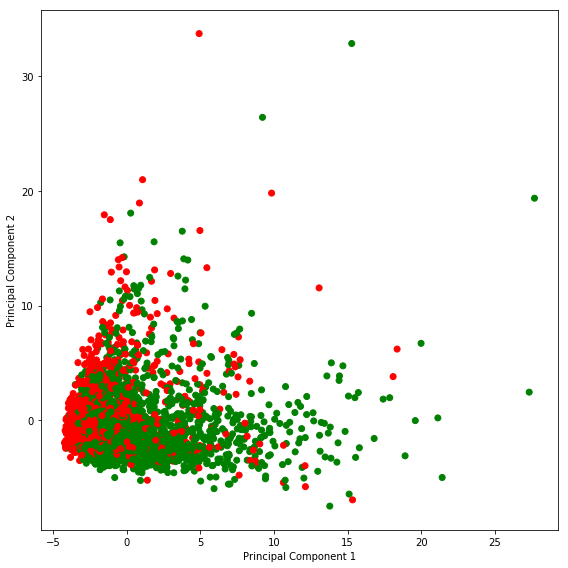

In [89]:
# let's also visualize the data to see if we can spot any patterns
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [90]:
# Creating correlation matrix for the principal components

corrmat = np.corrcoef(df_train_pca.transpose())

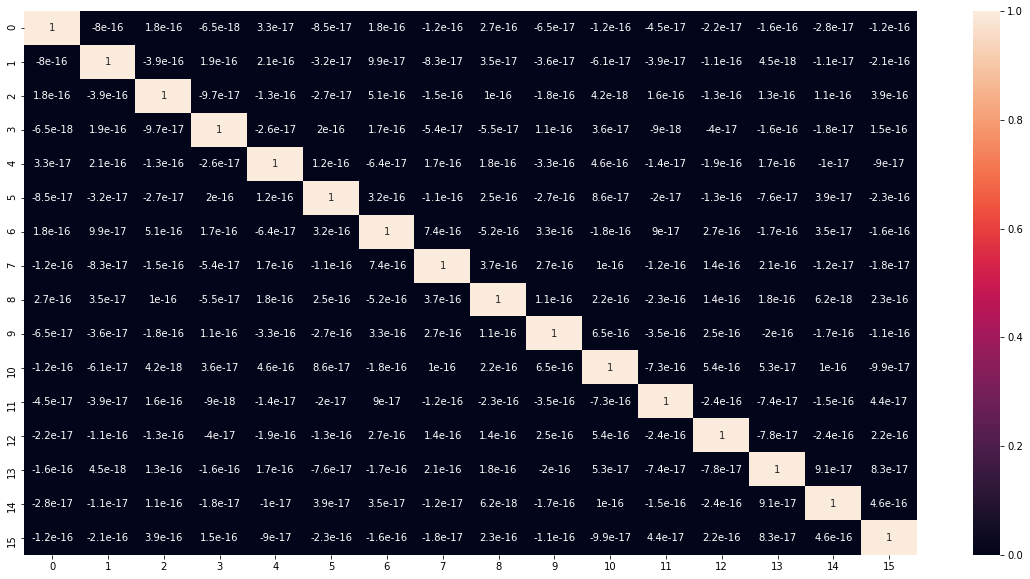

In [91]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [92]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 7.44485422123864e-16 , min corr:  -7.968384630741538e-16


In [93]:
# we can see that there is no correlation between any two components

In [94]:
#Applying selected components to the test data - 15 components
df_test_pca = pca_again.transform(X_test)
df_test_pca.shape

(1317, 16)

In [2]:
# MODEL BUILDING and EVALUATION ###
# 1. Logistic Regression
# 2. SVM Linear Classifier
# 3. SVM Non Linear Classifier
# 4. Random forest

### Applying logistic regression on principal components

In [96]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [97]:
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.85'

In [98]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [99]:
# similar area under curve for train and test data

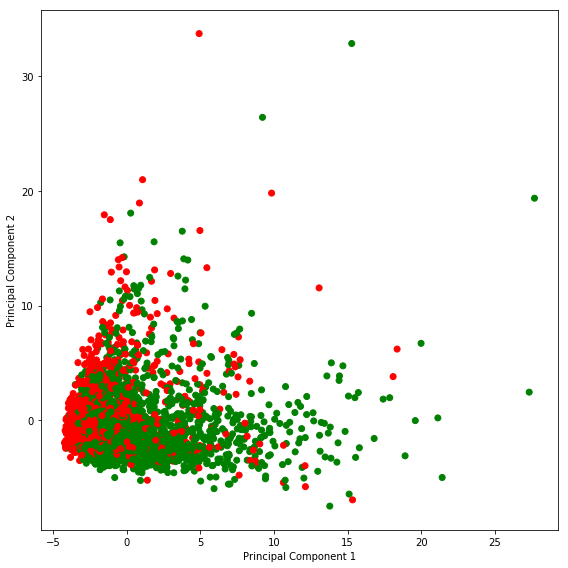

In [100]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Making Predictions

In [101]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [102]:
# Predicted probabilities
y_train_pred = logsk.predict_proba(df_train_pca)
# Converting y_pred to a dataframe which is an array
y_train_pred_df = pd.DataFrame(y_train_pred)
# Converting to column dataframe
y_train_pred_1 = y_train_pred_df.iloc[:,[1]]
# Let's see the head
y_train_pred_1.head()

,1
0,0.256271
1,0.685354
2,0.245889
3,0.843931
4,0.394711


In [103]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Churn_NoChurn
69694,1
99617,0
15209,1
55574,1
68563,0


In [104]:
# Putting mobile_number to index
y_train_df['mobile_number'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_train_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_train_pred_final = pd.concat([y_train_df,y_train_pred_1],axis=1)
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_train_pred_final = y_train_pred_final.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_train_pred_final.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,69694,1,0.256271
1,99617,0,0.685354
2,15209,1,0.245889
3,55574,1,0.843931
4,68563,0,0.394711


In [105]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.3 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
# Let's see the head
y_train_pred_final.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,69694,1,0.256271,0
1,99617,0,0.685354,1
2,15209,1,0.245889,0
3,55574,1,0.843931,1
4,68563,0,0.394711,1


## Model Evaluation

In [106]:
from sklearn import metrics

In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn_NoChurn, y_train_pred_final.predicted )
confusion

array([[1111,  698],
       [ 173, 1091]], dtype=int64)

In [108]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn_NoChurn, y_train_pred_final.predicted)

0.7165636186137325

In [109]:
print(metrics.precision_score(y_train_pred_final.Churn_NoChurn, y_train_pred_final.predicted))

0.6098378982671884


In [110]:
print(metrics.recall_score(y_train_pred_final.Churn_NoChurn, y_train_pred_final.predicted))

0.8631329113924051


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8631329113924051

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.6141514648977335

In [114]:


# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.38584853510226647


In [115]:
# positive predictive value 
print (TP / float(TP+FP))

0.6098378982671884


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8652647975077882


## Plotting ROC Curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

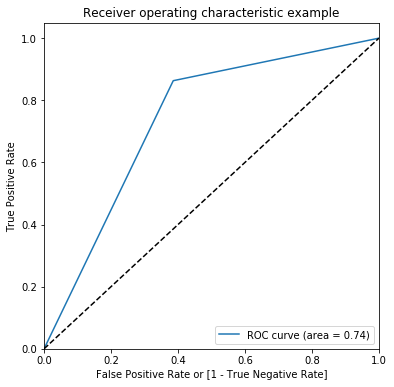

(array([0.        , 0.38584854, 1.        ]),
 array([0.        , 0.86313291, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [118]:
draw_roc(y_train_pred_final.Churn_NoChurn, y_train_pred_final.predicted)

### Finding Optimal Cutoff point

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,69694,1,0.256271,0,1,1,1,0,0,0,0,0,0,0
1,99617,0,0.685354,1,1,1,1,1,1,1,1,0,0,0
2,15209,1,0.245889,0,1,1,1,0,0,0,0,0,0,0
3,55574,1,0.843931,1,1,1,1,1,1,1,1,1,1,0
4,68563,0,0.394711,1,1,1,1,1,0,0,0,0,0,0


In [120]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn_NoChurn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.411324  1.000000  0.000000
0.1   0.1  0.541165  0.967563  0.243228
0.2   0.2  0.639766  0.926424  0.439469
0.3   0.3  0.716564  0.863133  0.614151
0.4   0.4  0.777416  0.792722  0.766722
0.5   0.5  0.797267  0.704114  0.862355
0.6   0.6  0.787179  0.588608  0.925926
0.7   0.7  0.746827  0.442247  0.959646
0.8   0.8  0.676538  0.244462  0.978441
0.9   0.9  0.622193  0.096519  0.989497


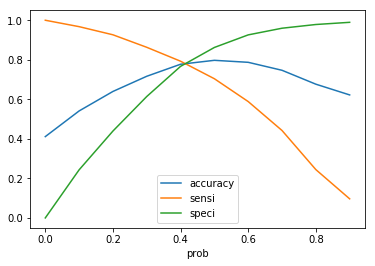

In [121]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,69694,1,0.256271,0,1,1,1,0,0,0,0,0,0,0,0
1,99617,0,0.685354,1,1,1,1,1,1,1,1,0,0,0,1
2,15209,1,0.245889,0,1,1,1,0,0,0,0,0,0,0,0
3,55574,1,0.843931,1,1,1,1,1,1,1,1,1,1,0,1
4,68563,0,0.394711,1,1,1,1,1,0,0,0,0,0,0,0


In [123]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn_NoChurn, y_train_pred_final.final_predicted)

0.7803449397982427

In [218]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn_NoChurn, y_train_pred_final.final_predicted )
confusion2

array([[1421,  388],
       [ 287,  977]], dtype=int64)

In [219]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [221]:
# Let's see the sensitivity of our logistic regression model
TP2 / float(TP2+FN2)

0.7729430379746836

In [222]:
# Let us calculate specificity
TN2 / float(TN2+FP2)

0.7855168601437258

In [223]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP2/ float(TN2+FP2))

0.21448313985627418


In [224]:
# Positive predictive value 
print (TP2 / float(TP2+FP2))

0.7157509157509158


In [225]:
# Negative predictive value
print (TN2 / float(TN2+ FN2))

0.8319672131147541


### Precision and Recall

In [131]:
# Precison
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7157509157509158

In [132]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7729430379746836

### Precision and Recall Tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Churn_NoChurn, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       1
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      1
 27      1
 28      1
 29      0
        ..
 3043    0
 3044    0
 3045    0
 3046    1
 3047    0
 3048    1
 3049    1
 3050    1
 3051    0
 3052    0
 3053    0
 3054    0
 3055    1
 3056    0
 3057    0
 3058    1
 3059    1
 3060    1
 3061    1
 3062    1
 3063    0
 3064    0
 3065    0
 3066    0
 3067    0
 3068    0
 3069    0
 3070    0
 3071    1
 3072    1
 Name: Churn_NoChurn, Length: 3073, dtype: int32, 0       0
 1       1
 2       0
 3       1
 4       1
 5       0
 6       1
 7       0
 8       1
 9       1
 10      1
 11      0
 12      1
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25  

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn_NoChurn, y_train_pred_final.Churn_Prob)

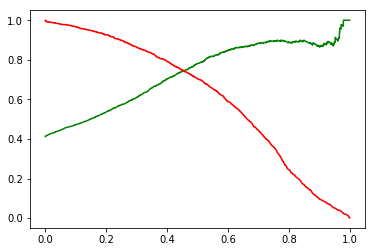

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on test set

In [237]:
#X_test.head()

In [226]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_test, y_test)
logsk.fit(df_test_pca, y_test)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [227]:
# Predicted probabilities
y_pred = logsk.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.791630
1,0.578577
2,0.469341
3,0.303446
4,0.000517


In [228]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn_NoChurn
53510,1
51772,0
89896,0
12126,0
90187,0


In [229]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,53510,1,0.791630
1,51772,0,0.578577
2,89896,0,0.469341
3,12126,0,0.303446
4,90187,0,0.000517


In [230]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,53510,1,0.791630,1
1,51772,0,0.578577,1
2,89896,0,0.469341,1
3,12126,0,0.303446,0
4,90187,0,0.000517,0


In [231]:
from sklearn import metrics

In [232]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix( y_pred_final.Churn_NoChurn, y_pred_final.predicted )
confusion_test

array([[637, 141],
       [103, 436]], dtype=int64)

In [233]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [234]:
# Let's see the sensitivity or Recall of our logistic regression model
TP_test / float(TP_test+FN_test)

0.8089053803339518

In [235]:
# Let us calculate specificity
TN_test / float(TN_test+FP_test)

0.8187660668380463

In [236]:
# Precison
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.755632582322357

In [326]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_test/ float(TN_test+FP_test))


0.18123393316195371

##### The sensitivity and the specificity of the train and test data is similar so the model will satisfy in identifying the Churn customers in telecom firm.The recall score is hicher than the precision which helps in identifying more Churn customers.


In [150]:
# Model Building Using SVM
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC

### linear SVM Classifier #

In [152]:
# Perform grid search on 'recall' to find optimal value of hyper parameter C

In [153]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
#scores = ['accuracy', 'precision', 'recall']
scores = ['recall']
folds = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 4)

In [154]:
for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = model_selection.GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(df_train_pca, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")


# Tuning hyper-parameters for recall
 The highest recall score is 0.6355018400542918 at C = {'C': 10}




In [155]:

svc = SVC(kernel='linear', random_state=0, C=10, probability=True)
#svc1 = SVC(kernel='linear', random_state=0)

In [156]:

model_svm_linear = svc.fit(df_train_pca, y_train)

#model_svm_linear1 = svc1.fit(df_train_pca, y_train)

In [324]:
model_svm_linear.coef_

array([[-0.31794638,  0.11711936,  0.03333825, -0.00451594,  0.11674549,
         0.2391549 , -0.02091251, -0.63964593,  0.48100851, -0.48751152,
         0.14808537,  0.12967766, -0.00643935,  0.19924149,  0.07321074,
         0.39794176]])

In [157]:
y_pred = model_svm_linear.predict(df_test_pca)

In [158]:
metrics.accuracy_score(y_test, y_pred)

0.8086560364464692

In [159]:
# Predicted probabilities
#model_svm_linear.probability = True
#clf=svm.SVC(probability=True)
y_pred_svm_linear = model_svm_linear.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df_svm_linear = pd.DataFrame(y_pred_svm_linear)
# Converting to column dataframe
y_pred_df_svm_linear = y_pred_df_svm_linear.iloc[:,[1]]
# Let's see the head
y_pred_df_svm_linear.head()

,1
0,0.752734
1,0.571165
2,0.460048
3,0.454812
4,0.013599


In [160]:
# Converting y_test to dataframe
y_test_df_svm_linear = pd.DataFrame(y_test)
y_test_df_svm_linear.head()

,Churn_NoChurn
53510,1
51772,0
89896,0
12126,0
90187,0


In [161]:
# Putting mobile_number to index
y_test_df_svm_linear['mobile_number'] = y_test_df_svm_linear.index
# Removing index for both dataframes to append them side by side 
y_pred_df_svm_linear.reset_index(drop=True, inplace=True)
y_test_df_svm_linear.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_svm_linear = pd.concat([y_test_df_svm_linear,y_pred_df_svm_linear],axis=1)
# Renaming the column 
y_pred_final_svm_linear= y_pred_final_svm_linear.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final_svm_linear = y_pred_final_svm_linear.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final_svm_linear.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,53510,1,0.752734
1,51772,0,0.571165
2,89896,0,0.460048
3,12126,0,0.454812
4,90187,0,0.013599


In [162]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,53510,1,0.870021,1
1,51772,0,0.636379,1
2,89896,0,0.442320,0
3,12126,0,0.409851,0
4,90187,0,0.000003,0


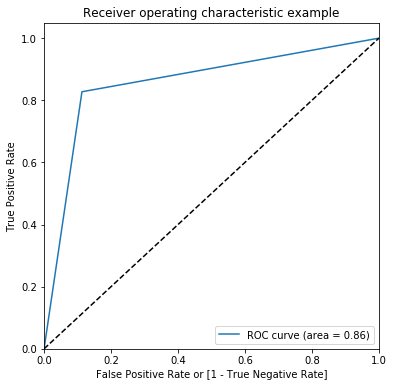

(array([0.        , 0.11311054, 1.        ]),
 array([0.        , 0.82745826, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [163]:
draw_roc(y_pred_final.Churn_NoChurn, y_pred_final.predicted)

In [164]:
# Finding Optimal Cutoff point

In [165]:
# # Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_svm_linear[i]= y_pred_final_svm_linear.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final_svm_linear.head()

,mobile_number,Churn_NoChurn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,53510,1,0.752734,1,1,1,1,1,1,1,1,0,0
1,51772,0,0.571165,1,1,1,1,1,1,0,0,0,0
2,89896,0,0.460048,1,1,1,1,1,0,0,0,0,0
3,12126,0,0.454812,1,1,1,1,1,0,0,0,0,0
4,90187,0,0.013599,1,0,0,0,0,0,0,0,0,0


In [166]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_svm_linear.Churn_NoChurn, y_pred_final_svm_linear[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.409263  1.000000  0.000000
0.1   0.1  0.519362  0.966605  0.209512
0.2   0.2  0.637054  0.935065  0.430591
0.3   0.3  0.727411  0.892393  0.613111
0.4   0.4  0.802582  0.816327  0.793059
0.5   0.5  0.808656  0.714286  0.874036
0.6   0.6  0.794229  0.610390  0.921594
0.7   0.7  0.753227  0.467532  0.951157
0.8   0.8  0.678815  0.248609  0.976864
0.9   0.9  0.627183  0.102041  0.991003


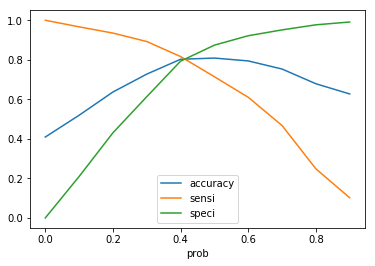

In [167]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [294]:
#the optimal point seems to be around 0.42
y_pred_final_svm_linear['final_predicted'] = y_pred_final_svm_linear.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_pred_final_svm_linear.head()

,mobile_number,Churn_NoChurn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,53510,1,0.752734,1,1,1,1,1,1,1,1,0,0,1
1,51772,0,0.571165,1,1,1,1,1,1,0,0,0,0,1
2,89896,0,0.460048,1,1,1,1,1,0,0,0,0,0,1
3,12126,0,0.454812,1,1,1,1,1,0,0,0,0,0,1
4,90187,0,0.013599,1,0,0,0,0,0,0,0,0,0,0


In [295]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final_svm_linear.Churn_NoChurn, y_pred_final_svm_linear.final_predicted)

0.8048595292331056

In [296]:
confusion_svm_linear = metrics.confusion_matrix(y_pred_final_svm_linear.Churn_NoChurn, y_pred_final_svm_linear.final_predicted )
confusion_svm_linear

array([[630, 148],
       [109, 430]], dtype=int64)

In [315]:
TP_svm_linear = confusion_svm_linear[1,1] # true positive 
TN_svm_linear = confusion_svm_linear[0,0] # true negatives
FP_svm_linear = confusion_svm_linear[0,1] # false positives
FN_svm_linear = confusion_svm_linear[1,0] # false negatives

In [316]:
# Recall
sensitivity_svm_linear=confusion_svm_linear[1,1]/(confusion_svm_linear[1,0]+confusion_svm_linear[1,1])
sensitivity_svm_linear

0.7977736549165121

In [317]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_svm_linear/ float(TN_svm_linear+FP_svm_linear))

0.19023136246786632


In [299]:
from sklearn.metrics import precision_recall_curve

In [300]:
y_pred_final_svm_linear.Churn_NoChurn, y_pred_final_svm_linear.final_predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       1
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      1
 27      1
 28      0
 29      0
        ..
 1287    0
 1288    0
 1289    0
 1290    0
 1291    0
 1292    0
 1293    1
 1294    1
 1295    0
 1296    0
 1297    1
 1298    0
 1299    1
 1300    1
 1301    1
 1302    1
 1303    0
 1304    0
 1305    1
 1306    1
 1307    0
 1308    0
 1309    1
 1310    0
 1311    1
 1312    1
 1313    0
 1314    1
 1315    1
 1316    0
 Name: Churn_NoChurn, Length: 1317, dtype: int32, 0       1
 1       1
 2       1
 3       1
 4       0
 5       0
 6       1
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      1
 24      1
 25  

In [301]:
p, r, thresholds = precision_recall_curve(y_pred_final_svm_linear.Churn_NoChurn, y_pred_final_svm_linear.Churn_Prob)

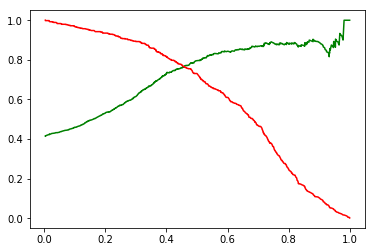

In [302]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [303]:
#K-Fold Cross Validation

# creating a KFold object with 5 splits 
from sklearn import model_selection
folds = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
#model = SVC(C = 1)

In [304]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = model_selection.cross_val_score(model_svm_linear, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [305]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.81788618 0.77073171 0.82601626 0.80944625 0.78990228]
mean accuracy = 0.8027965361086835


In [306]:
#Making prediction on the test data
pred_probs_test_svm_linear = model_svm_linear.predict_proba(df_test_pca)[:,1]
area_svm_linear="{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_svm_linear))
area_svm_linear

'0.87'

In [307]:
# Let's run the model using the selected variables

svc_linear = SVC(kernel='linear', random_state=0, C=10, probability=True)
model_svm_linear = svc_linear.fit(df_test_pca, y_test)


In [308]:
# Predicted probabilities
y_pred_svm_linear_test = model_svm_linear.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_svm_linear_test_df= pd.DataFrame(y_pred_svm_linear_test)
# Converting to column dataframe
y_pred_svm_linear_test_1 = y_pred_svm_linear_test_df.iloc[:,[1]]
# Let's see the head
y_pred_svm_linear_test_1.head()

,1
0,0.763519
1,0.559895
2,0.458064
3,0.357315
4,0.001796


In [309]:
# Converting y_test to dataframe
y_test_df_svm_linear = pd.DataFrame(y_test)
y_test_df_svm_linear.head()

,Churn_NoChurn
53510,1
51772,0
89896,0
12126,0
90187,0


In [310]:
# Putting CustID to index
y_test_df_svm_linear['mobile_number'] = y_test_df_svm_linear.index
# Removing index for both dataframes to append them side by side 
y_pred_svm_linear_test_1.reset_index(drop=True, inplace=True)
y_test_df_svm_linear.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final_svm_linear = pd.concat([y_test_df_svm_linear,y_pred_svm_linear_test_1],axis=1)
# Renaming the column 
y_test_pred_final_svm_linear= y_test_pred_final_svm_linear.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_pred_final_svm_linear = y_test_pred_final_svm_linear.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_test_pred_final_svm_linear.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,53510,1,0.763519
1,51772,0,0.559895
2,89896,0,0.458064
3,12126,0,0.357315
4,90187,0,0.001796


In [311]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.42 else 0
y_test_pred_final_svm_linear['predicted'] = y_test_pred_final_svm_linear.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
# Let's see the head
y_test_pred_final_svm_linear.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,53510,1,0.763519,1
1,51772,0,0.559895,1
2,89896,0,0.458064,1
3,12126,0,0.357315,0
4,90187,0,0.001796,0


In [312]:
# Confusion matrix 
confusion_test_svm_linear = metrics.confusion_matrix(y_test_pred_final_svm_linear.Churn_NoChurn, y_test_pred_final_svm_linear.predicted )
confusion_test_svm_linear

array([[640, 138],
       [105, 434]], dtype=int64)

In [313]:
TP_test_svm_linear = confusion_test_svm_linear[1,1] # true positive 
TN_test_svm_linear = confusion_test_svm_linear[0,0] # true negatives
FP_test_svm_linear = confusion_test_svm_linear[0,1] # false positives
FN_test_svm_linear = confusion_test_svm_linear[1,0] # false negatives

In [314]:
# Let's see the sensitivity or Recall of our linear SVM model
TP_test_svm_linear / float(TP_test_svm_linear+FN_test_svm_linear)

0.8051948051948052

In [318]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_test_svm_linear/ float(TN_test_svm_linear+FP_test_svm_linear))

0.17737789203084833


### Using non linear SVM (kernel = rbf) ###

#### Grid Search to find optimal hyperparameters C and gamma


In [190]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                     'C': [1, 10, 100, 1000, 10000, 100000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)            

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06], 'C': [1, 10, 100, 1000, 10000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [191]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.212502,0.098941,0.227875,0.013091,1,0.01,"{'C': 1, 'gamma': 0.01}",0.710843,0.644068,0.669421,...,0.672455,0.024356,23,0.777340,0.810311,0.800391,0.786427,0.780586,0.791011,0.012467
1,1.071576,0.023049,0.238471,0.024918,1,0.001,"{'C': 1, 'gamma': 0.001}",0.738956,0.728814,0.719008,...,0.713174,0.024066,16,0.711330,0.735409,0.729941,0.725549,0.722952,0.725036,0.008051
2,1.354414,0.026204,0.298644,0.002643,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.522088,0.546610,0.533058,...,0.494613,0.049068,25,0.493596,0.535992,0.514677,0.468064,0.468150,0.496096,0.026495
3,1.448778,0.047512,0.309227,0.005116,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.000000,0.000000,0.000000,...,0.000000,0.000000,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.449174,0.035775,0.308629,0.004831,1,1e-06,"{'C': 1, 'gamma': 1e-06}",0.000000,0.000000,0.000000,...,0.000000,0.000000,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1.218885,0.026425,0.218484,0.004311,10,0.01,"{'C': 10, 'gamma': 0.01}",0.742972,0.661017,0.677686,...,0.704707,0.031352,17,0.908374,0.930934,0.918787,0.914172,0.910010,0.916455,0.008089
6,0.973036,0.017658,0.188896,0.004132,10,0.001,"{'C': 10, 'gamma': 0.001}",0.751004,0.716102,0.747934,...,0.735283,0.022282,10,0.763547,0.795720,0.774951,0.775449,0.769464,0.775826,0.010844
7,1.065792,0.017529,0.223480,0.003384,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.738956,0.733051,0.731405,...,0.718755,0.024045,15,0.716256,0.739300,0.731898,0.725549,0.730030,0.728607,0.007604
8,1.357232,0.022335,0.298629,0.003756,10,1e-05,"{'C': 10, 'gamma': 1e-05}",0.518072,0.546610,0.524793,...,0.489940,0.049954,26,0.489655,0.535992,0.517613,0.464072,0.463094,0.494085,0.028950
9,1.453761,0.041223,0.309229,0.004231,10,1e-06,"{'C': 10, 'gamma': 1e-06}",0.000000,0.000000,0.000000,...,0.000000,0.000000,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [192]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7504171217084867 corresponding to hyperparameters {'C': 10000, 'gamma': 1e-05}


In [186]:
# Building and Evaluating the final Model

In [202]:
svc_non_linear = SVC(kernel='rbf' , gamma=1e-05, random_state=0, C=10000, probability = True)

In [203]:
model_svm_non_linear = svc_non_linear.fit(df_train_pca, y_train)

In [204]:
# Predicted probabilities
y_pred_svm_non_linear = model_svm_non_linear.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_svm_non_linear_df = pd.DataFrame(y_pred_svm_non_linear)
# Converting to column dataframe
y_pred_svm_non_linear_df  = y_pred_svm_non_linear_df.iloc[:,[1]]
# Let's see the head
y_pred_svm_non_linear_df.head()

,1
0,0.776509
1,0.582734
2,0.479111
3,0.438140
4,0.263000


In [205]:
# Converting y_test to dataframe
y_test_svm_non_linear = pd.DataFrame(y_test)
y_test_svm_non_linear.head()

,Churn_NoChurn
53510,1
51772,0
89896,0
12126,0
90187,0


In [206]:
# Putting mobile_number to index
y_test_svm_non_linear['mobile_number'] = y_test_svm_non_linear.index
# Removing index for both dataframes to append them side by side 
y_pred_svm_non_linear_df.reset_index(drop=True, inplace=True)
y_test_svm_non_linear.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_svm_nl = pd.concat([y_test_svm_non_linear,y_pred_svm_non_linear_df],axis=1)
# Renaming the column 
y_pred_final_svm_nl= y_pred_final_svm_nl.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final_svm_nl = y_pred_final_svm_nl.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final_svm_nl.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,53510,1,0.776509
1,51772,0,0.582734
2,89896,0,0.479111
3,12126,0,0.438140
4,90187,0,0.263000


In [207]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final_svm_nl['predicted'] = y_pred_final_svm_nl.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final_svm_nl.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,53510,1,0.776509,1
1,51772,0,0.582734,1
2,89896,0,0.479111,0
3,12126,0,0.438140,0
4,90187,0,0.263000,0


#### Finding Optimal Cutoff point

In [209]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_svm_nl[i]= y_pred_final_svm_nl.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final_svm_nl.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,53510,1,0.776509,1,1,1,1,1,1,1,1,1,0,0
1,51772,0,0.582734,1,1,1,1,1,1,1,0,0,0,0
2,89896,0,0.479111,0,1,1,1,1,1,0,0,0,0,0
3,12126,0,0.438140,0,1,1,1,1,1,0,0,0,0,0
4,90187,0,0.263000,0,1,1,1,0,0,0,0,0,0,0


In [210]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_svm_nl.Churn_NoChurn, y_pred_final_svm_nl[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.409263  1.000000  0.000000
0.1   0.1  0.525437  0.974026  0.214653
0.2   0.2  0.647684  0.933210  0.449871
0.3   0.3  0.746393  0.892393  0.645244
0.4   0.4  0.801063  0.812616  0.793059
0.5   0.5  0.808656  0.706865  0.879177
0.6   0.6  0.798026  0.623377  0.919023
0.7   0.7  0.767654  0.506494  0.948586
0.8   0.8  0.691724  0.283859  0.974293
0.9   0.9  0.629461  0.109462  0.989717


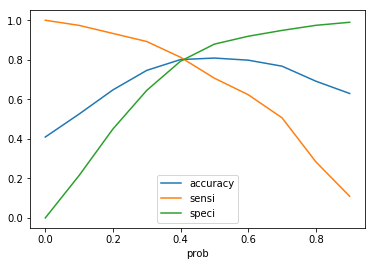

In [211]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [278]:
# From the curve above, 0.42 is the optimum point to take it as a cutoff probability.
y_pred_final_svm_nl['final_predicted'] = y_pred_final_svm_nl.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_pred_final_svm_nl.head()


,mobile_number,Churn_NoChurn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,53510,1,0.776509,1,1,1,1,1,1,1,1,1,0,0,1
1,51772,0,0.582734,1,1,1,1,1,1,1,0,0,0,0,1
2,89896,0,0.479111,0,1,1,1,1,1,0,0,0,0,0,1
3,12126,0,0.438140,0,1,1,1,1,1,0,0,0,0,0,1
4,90187,0,0.263000,0,1,1,1,0,0,0,0,0,0,0,0


In [279]:
# Model Evaluation

In [280]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final_svm_nl.Churn_NoChurn, y_pred_final_svm_nl.final_predicted)

0.8048595292331056

In [281]:
confusion_svm_nl = metrics.confusion_matrix(y_pred_final_svm_nl.Churn_NoChurn, y_pred_final_svm_nl.final_predicted )
confusion_svm_nl

array([[633, 145],
       [112, 427]], dtype=int64)

In [282]:
TP_svm_nl = confusion_svm_nl[1,1] # true positive 
TN_svm_nl = confusion_svm_nl[0,0] # true negatives
FP_svm_nl = confusion_svm_nl[0,1] # false positives
FN_svm_nl = confusion_svm_nl[1,0] # false negatives

In [283]:
# Let's see the sensitivity 
sensitivity_svm_nl=TP_svm_nl / float(TP_svm_nl+FN_svm_nl)
sensitivity_svm_nl

0.7922077922077922

In [319]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_svm_nl/ float(TN_svm_nl+FP_svm_nl))

0.18637532133676094


#### Making Predictions on test set

In [285]:
# Let's run the model using the selected variables

svc_non_linear = SVC(kernel='rbf' , gamma=1e-05, random_state=0, C=10000, probability = True)
model_svm_non_linear = svc_non_linear.fit(df_test_pca, y_test)
#logsk.fit(X_test, y_test)
#logsk.fit(df_test_pca, y_test)

In [286]:
# Predicted probabilities
y_pred_svm_nl_test = model_svm_non_linear.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_svm_nl_test_df= pd.DataFrame(y_pred_svm_nl_test)
# Converting to column dataframe
y_pred_svm_nl_test_1 = y_pred_svm_nl_test_df.iloc[:,[1]]
# Let's see the head
y_pred_svm_nl_test_1.head()

,1
0,0.785455
1,0.577686
2,0.492958
3,0.338039
4,0.013996


In [287]:
# Converting y_test to dataframe
y_test_df_svm_nl = pd.DataFrame(y_test)
y_test_df_svm_nl.head()

,Churn_NoChurn
53510,1
51772,0
89896,0
12126,0
90187,0


In [288]:
# Putting CustID to index
y_test_df_svm_nl['mobile_number'] = y_test_df_svm_nl.index
# Removing index for both dataframes to append them side by side 
y_pred_svm_nl_test_1.reset_index(drop=True, inplace=True)
y_test_df_svm_nl.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final_svm_nl = pd.concat([y_test_df_svm_nl,y_pred_svm_nl_test_1],axis=1)
# Renaming the column 
y_test_pred_final_svm_nl= y_test_pred_final_svm_nl.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_pred_final_svm_nl = y_test_pred_final_svm_nl.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_test_pred_final_svm_nl.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,53510,1,0.785455
1,51772,0,0.577686
2,89896,0,0.492958
3,12126,0,0.338039
4,90187,0,0.013996


In [289]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.42 else 0
y_test_pred_final_svm_nl['predicted'] = y_test_pred_final_svm_nl.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
# Let's see the head
y_test_pred_final_svm_nl.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,53510,1,0.785455,1
1,51772,0,0.577686,1
2,89896,0,0.492958,1
3,12126,0,0.338039,0
4,90187,0,0.013996,0


In [290]:
# Confusion matrix 
confusion_test_svm_nl = metrics.confusion_matrix(y_test_pred_final_svm_nl.Churn_NoChurn, y_test_pred_final_svm_nl.predicted )
confusion_test_svm_nl

array([[643, 135],
       [105, 434]], dtype=int64)

In [292]:
TP_test_svm_nl = confusion_test_svm_nl[1,1] # true positive 
TN_test_svm_nl = confusion_test_svm_nl[0,0] # true negatives
FP_test_svm_nl = confusion_test_svm_nl[0,1] # false positives
FN_test_svm_nl = confusion_test_svm_nl[1,0] # false negatives

In [293]:
# Let's see the sensitivity or Recall of our non linear SVM model
TP_test_svm_nl / float(TP_test_svm_nl+FN_test_svm_nl)

0.8051948051948052

In [320]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_test_svm_nl/ float(TN_test_svm_nl+FP_test_svm_nl))

0.17352185089974292


In [247]:
# Random Forest ##

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
random_forest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [251]:
model_random_forest= random_forest.fit(df_train_pca, y_train)

In [252]:
# Predicted probabilities
y_pred_random_forest = model_random_forest.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_random_forest_df = pd.DataFrame(y_pred_random_forest)
# Converting to column dataframe
y_pred_random_forest_df  = y_pred_random_forest_df.iloc[:,[1]]
# Let's see the head
y_pred_random_forest_df.head()

,1
0,0.9
1,0.9
2,0.8
3,0.2
4,0.3


In [253]:
# Converting y_test to dataframe
y_test_random_forest = pd.DataFrame(y_test)
y_test_random_forest.head()

,Churn_NoChurn
53510,1
51772,0
89896,0
12126,0
90187,0


In [254]:
# Putting mobile_number to index
y_test_random_forest['mobile_number'] = y_test_random_forest.index
# Removing index for both dataframes to append them side by side 
y_pred_random_forest_df.reset_index(drop=True, inplace=True)
y_test_random_forest.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final_random_forest = pd.concat([y_test_random_forest,y_pred_random_forest_df],axis=1)
# Renaming the column 
y_pred_final_random_forest= y_pred_final_random_forest.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final_random_forest = y_pred_final_random_forest.reindex_axis(['mobile_number','Churn_NoChurn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final_random_forest.head()

C:\Users\gagandeep\UPGRAD\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn_NoChurn,Churn_Prob
0,53510,1,0.9
1,51772,0,0.9
2,89896,0,0.8
3,12126,0,0.2
4,90187,0,0.3


In [255]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final_random_forest['predicted'] = y_pred_final_random_forest.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final_random_forest.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted
0,53510,1,0.9,1
1,51772,0,0.9,1
2,89896,0,0.8,1
3,12126,0,0.2,0
4,90187,0,0.3,0


In [256]:
# Finding Optimal Cutoff point

In [257]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_random_forest[i]= y_pred_final_random_forest.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final_random_forest.head()

,mobile_number,Churn_NoChurn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,53510,1,0.9,1,1,1,1,1,1,1,1,1,1,0
1,51772,0,0.9,1,1,1,1,1,1,1,1,1,1,0
2,89896,0,0.8,1,1,1,1,1,1,1,1,1,0,0
3,12126,0,0.2,0,1,1,0,0,0,0,0,0,0,0
4,90187,0,0.3,0,1,1,1,0,0,0,0,0,0,0


In [258]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_random_forest.Churn_NoChurn, y_pred_final_random_forest[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.485953  0.977737  0.145244
0.1   0.1  0.593014  0.916512  0.368895
0.2   0.2  0.675778  0.853432  0.552699
0.3   0.3  0.732726  0.782931  0.697943
0.4   0.4  0.766135  0.701299  0.811054
0.5   0.5  0.769932  0.612245  0.879177
0.6   0.6  0.756264  0.515770  0.922879
0.7   0.7  0.729689  0.413729  0.948586
0.8   0.8  0.687168  0.282004  0.967866
0.9   0.9  0.642369  0.135436  0.993573


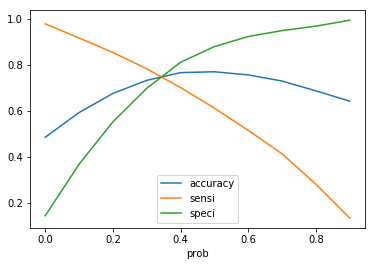

In [259]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [260]:
# From the curve above, 0.37 is the optimum point to take it as a cutoff probability.
y_pred_final_random_forest['final_predicted'] = y_pred_final_random_forest.Churn_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_pred_final_random_forest.head()


,mobile_number,Churn_NoChurn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,53510,1,0.9,1,1,1,1,1,1,1,1,1,1,0,1
1,51772,0,0.9,1,1,1,1,1,1,1,1,1,1,0,1
2,89896,0,0.8,1,1,1,1,1,1,1,1,1,0,0,1
3,12126,0,0.2,0,1,1,0,0,0,0,0,0,0,0,0
4,90187,0,0.3,0,1,1,1,0,0,0,0,0,0,0,0


In [261]:
# Model Evaluation

In [262]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final_random_forest.Churn_NoChurn, y_pred_final_random_forest.final_predicted)

0.7327258921791951

In [263]:
confusion_random_forest = metrics.confusion_matrix(y_pred_final_random_forest.Churn_NoChurn, y_pred_final_random_forest.final_predicted )
confusion_random_forest

array([[543, 235],
       [117, 422]], dtype=int64)

In [264]:
TP_random_forest = confusion_random_forest[1,1] # true positive 
TN_random_forest = confusion_random_forest[0,0] # true negatives
FP_random_forest = confusion_random_forest[0,1] # false positives
FN_random_forest = confusion_random_forest[1,0] # false negatives

In [265]:
# Let's see the sensitivity of our Random Forest model
sensitivity_random_forest = TP_random_forest / float(TP_random_forest+FN_random_forest)

In [266]:
sensitivity_random_forest 

0.7829313543599258

In [ ]:
## Model Selection
###
### Comparing Logistic Regression Model with Linear SVM model
### Performance of rbf as well as linear SVM is similar.. so, probably there is very less non linearity in the model
### Moreover, we can view the feature coefficients only in Linear SVM

### so we compare LOGISTIC REGRESSION and LINEAR SVM

In [ ]:
### Logistic Regression Parameters
### Sensitivity = 0.81
### fasle positive rate = 0.18

In [329]:
# Linear svm classifier
# Sensitivity = 0.805
# fasle positive rate = 0.177

#### the sensitivity and false positive rates for training as well as test data are more close in SVM


#### Therefore SVM is our final model with kernel='linear', C= 10

In [332]:
# Finding coefficient weights for linear SVM
model_svm_linear.coef_

array([[-0.31794638,  0.11711936,  0.03333825, -0.00451594,  0.11674549,
         0.2391549 , -0.02091251, -0.63964593,  0.48100851, -0.48751152,
         0.14808537,  0.12967766, -0.00643935,  0.19924149,  0.07321074,
         0.39794176]])

In [333]:
model_svm_linear.coef_.shape

(1, 16)

In [334]:
pca_again.components_.shape

(16, 126)

In [335]:
feature_coeff=np.dot(logsk.coef_ , pca_again.components_)

In [336]:
feature_coeff.shape

(1, 126)

In [337]:
abs_feature_coeff=abs(feature_coeff)

In [338]:
abs_feature_coeff_transpose=abs_feature_coeff.transpose()

In [360]:
feature_coeff

array([[ 7.58362762e-02,  1.63484474e-01, -1.99001108e-01,
         6.53199377e-02,  4.02910726e-02, -1.57401457e-01,
         7.11216542e-02,  4.62696109e-02, -2.08350523e-01,
         5.95908992e-03,  3.96531955e-02,  5.48981916e-02,
         1.32630522e-02,  5.20855736e-02,  5.76590661e-02,
        -1.65852102e-02, -3.14849696e-02, -1.02009974e-01,
        -8.96600668e-02, -1.20947787e-01, -2.26517788e-01,
         5.83777947e-02,  4.47329844e-02, -1.08558126e-01,
         3.05873754e-04, -2.13634419e-03, -5.98581167e-02,
        -6.37211292e-02, -9.30296815e-02, -2.11095656e-01,
         7.86854276e-02,  5.69073567e-02, -1.31755996e-01,
         1.14317019e-01,  8.79531669e-02, -1.28060436e-01,
        -2.34450502e-02, -8.67042757e-03, -5.15790038e-02,
         1.33442281e-01,  1.01147296e-01, -1.75589798e-01,
         2.92053744e-02,  1.76184936e-01,  4.05248533e-02,
         4.51768193e-02,  6.81305093e-02, -4.48349130e-02,
         1.78278154e-02,  1.04041180e-01,  4.78257990e-0

In [361]:
# arrange features in ascending order of weights
abs_feature_coeff.argsort()[-1::]

array([[ 24,  70, 102,  25, 100, 117, 112,   9, 111, 119, 103,  37,  96,
         69,  12,  68,  15, 118,  57,  48, 104,  81,  64,  79,  78,  36,
         99,  56, 115,  58,  76,  42,  63,  16,  84, 114, 109,  86, 113,
         10,  75,   4,  44, 108,  82,  91, 106,  22,  47,  45,   7,  50,
         97,  38,  73,  13,  90,  11,  31, 105,  14,  21,  52,  67,  26,
        110,  66,  27,   3, 122, 123,  46,  83,   6,  93,   0,  77,  71,
         30, 124,  60,  34,  98,  18, 107,  72,  74,  28,  85,  51, 101,
         65,  61,  40,  17, 116,  49,  55, 120,  23,  33,  19, 121,  80,
         59,  35,  54,  32,  39,  62, 125,   5,   1,  94,  92,  41,  43,
          2,  95,   8,  29,  20,  53,  88,  87,  89]], dtype=int64)

In [341]:
#[-1::]

In [362]:
abs_feature_coeff[0,89]

0.4353745444996177

In [363]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Average_6_7'],
      dtype='object', length=126)

In [364]:
X_train.columns[89]

'ic_others_8'

In [365]:
X_train.columns[87]

'ic_others_6'

In [366]:
X_train.columns[88]

'ic_others_7'

## END ###